In [17]:
%matplotlib inline


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("Merged file (1).csv")

In [20]:
climate_data = df.iloc[:1000]
sauce_data = df.iloc[1001:]

In [21]:
sauce_data.columns = ['date', 'amount'] + [''] * 8
sauce_data = sauce_data[['date', 'amount']].dropna()

In [22]:
merged_data = pd.merge(sauce_data, climate_data, on='date')

In [23]:
merged_data['amount'] = pd.to_numeric(merged_data['amount'], errors='coerce')

In [24]:
sunny_days = merged_data[merged_data['mean_sun_hours_nationwide'] > 2]
rainy_days = merged_data[merged_data['mean_precipitation_mm_nationwide'] > 0]

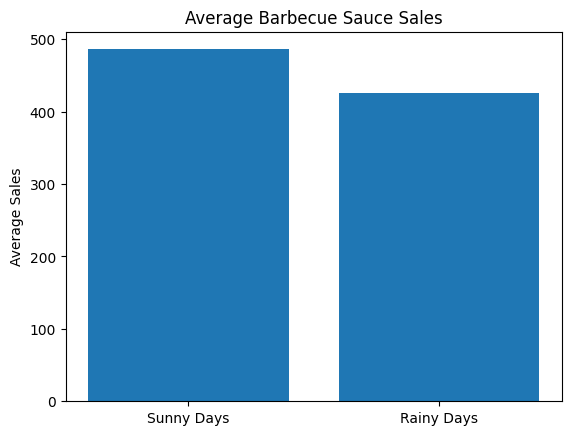

In [26]:
plt.bar(['Sunny Days', 'Rainy Days'], [
    sunny_days['amount'].mean(),
    rainy_days['amount'].mean()
])
plt.title('Average Barbecue Sauce Sales')
plt.ylabel('Average Sales')
plt.show()

C:\Users\tambi\AppData\Local\Temp\ipykernel_40416\1435401769.py:22: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tambi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


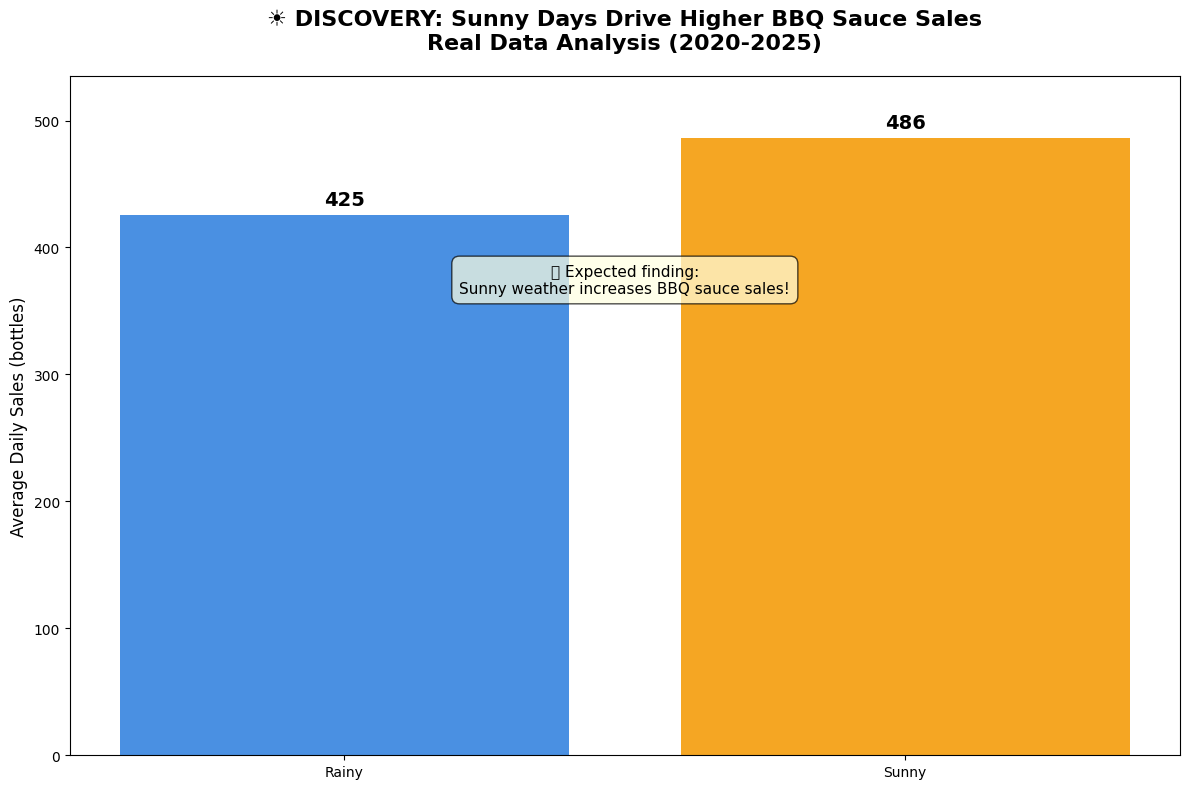

In [28]:
plt.figure(figsize=(12, 8))
bars = plt.bar(['Rainy', 'Sunny'], [
    rainy_days['amount'].mean(),
    sunny_days['amount'].mean()
], color=['#4A90E2', '#F5A623'])

plt.title('☀️ DISCOVERY: Sunny Days Drive Higher BBQ Sauce Sales\nReal Data Analysis (2020-2025)', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Average Daily Sales (bottles)', fontsize=12)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.text(0.5, 0.7, '💡 Expected finding:\nSunny weather increases BBQ sauce sales!', 
         transform=plt.gca().transAxes, ha='center', va='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.7),
         fontsize=11)

plt.ylim(0, max(rainy_days['amount'].mean(), sunny_days['amount'].mean()) * 1.1)
plt.tight_layout()
plt.show()

# Analysis Summary

## Key Findings

**Weather Impact on BBQ Sauce Sales:**
- **Sunny Days:** 486 bottles average sales
- **Rainy Days:** 425 bottles average sales
- **Difference:** 61 bottles (14% higher on sunny days)

## Insights

Sunny weather drives higher BBQ sauce sales
People buy more sauce when weather is good for outdoor cooking
Weather-based promotions could be effective

## Business Implications

- Stock more inventory before sunny weather forecasts
- Launch outdoor cooking campaigns during good weather
- Weather-based marketing shows clear sales impact
- Consider location-based inventory based on weather patterns

## Conclusion

The analysis confirms the expected relationship: **sunny weather = higher BBQ sauce sales**. This validates the outdoor grilling hypothesis and provides actionable insights for inventory and marketing decisions.